# 0. Prepare the Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("mean_values.csv")

In [3]:
df = df.dropna()

In [4]:
#Only keep the settle prices
cols1 = [c for c in df.columns if c[5:] != 'open']
df = df[cols1]

In [5]:
cols2 = [c for c in df.columns if c[5:] != 'high']
df = df[cols2]

In [6]:
cols3 = [c for c in df.columns if c[5:] != 'low']
df = df[cols3]

In [7]:
df.head()

,week,p0,p1,p2,f000_settle,f001_settle,f002_settle,f003_settle,f004_settle,f005_settle,...,f129_settle,f130_settle,f131_settle,f132_settle,f133_settle,f134_settle,f135_settle,f136_settle,f137_settle,week.1
0,2030,447.904385,469.788255,459.104019,56.234000,52.484000,0.63958,30.160,30.5620,1.479900,...,501.060000,11676.000000,11687.0,27336.000000,26134.000000,10694.0,9985.000000,9272.0,9362.000000,2030.0
1,2031,447.898821,471.534605,459.841461,54.854000,52.998000,0.65842,30.614,30.9900,1.486520,...,514.880000,10504.000000,10553.0,25626.000000,24084.000000,10082.0,9230.000000,9125.0,9167.000000,2031.0
2,2032,449.940416,484.941516,459.939091,51.364000,49.662000,0.68206,30.840,31.1860,1.520260,...,519.140000,10553.000000,10596.0,25308.000000,23554.000000,10370.0,9871.000000,9305.0,9268.000000,2032.0
3,2033,459.511550,499.467805,466.502830,45.660000,45.803000,0.68835,31.585,31.8905,1.472125,...,501.933333,11128.600000,11098.0,24289.600000,22876.000000,10410.6,10295.600000,9775.0,9709.800000,2033.0
4,2034,478.310867,508.004203,494.890734,44.653333,43.219333,0.69050,32.724,33.0560,1.449200,...,533.566667,11321.333333,11301.0,23615.333333,22982.666667,10835.0,10704.333333,9861.0,9846.333333,2034.0


In [8]:
import datetime

In [9]:
df.tail()

,week,p0,p1,p2,f000_settle,f001_settle,f002_settle,f003_settle,f004_settle,f005_settle,...,f129_settle,f130_settle,f131_settle,f132_settle,f133_settle,f134_settle,f135_settle,f136_settle,f137_settle,week.1
487,2519,548.431212,543.030242,560.959116,16.735000,17.005000,0.774540,31.302000,31.5660,1.421900,...,902.720000,14840.0,14925.000000,50904.000000,51080.000000,10942.0,11026.000000,24105.000000,23979.000000,2519.0
488,2520,555.273191,557.096804,569.961161,17.163000,17.283000,0.757980,30.885200,31.1204,1.394360,...,913.640000,14494.0,14564.400000,51524.800000,51709.600000,11155.2,11271.200000,24267.400000,24150.600000,2520.0
489,2521,561.131324,568.763557,580.429553,16.558333,16.941667,0.752567,30.726667,30.8400,1.359767,...,920.033333,14510.0,14588.333333,51046.666667,51223.333333,11265.0,11371.666667,23638.333333,23491.666667,2521.0
490,2522,555.078874,567.444204,575.777300,15.590000,16.100000,0.750240,31.006000,31.1180,1.356600,...,936.920000,14617.0,14684.000000,51056.000000,51234.000000,11449.0,11522.000000,23782.000000,23695.000000,2522.0
491,2523,558.787354,583.843444,583.304877,14.675000,15.295000,0.750700,30.976000,31.0880,1.352780,...,953.020000,14690.0,14759.000000,51034.000000,51218.000000,11240.0,11426.000000,23813.000000,23710.000000,2523.0


In [10]:
df.describe()

,week,p0,p1,p2,f000_settle,f001_settle,f002_settle,f003_settle,f004_settle,f005_settle,...,f129_settle,f130_settle,f131_settle,f132_settle,f133_settle,f134_settle,f135_settle,f136_settle,f137_settle,week.1
count,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,...,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000
mean,2276.158537,477.782171,499.671342,486.182400,20.395581,21.193762,0.869372,40.125926,40.373613,1.515091,...,765.764862,14342.036755,14372.524356,50292.318089,50228.486247,18933.726931,19011.975915,16917.393089,16951.081402,2276.158537
std,142.696448,100.305823,98.071476,98.883229,7.587655,7.149587,0.119321,8.998237,9.046536,0.122735,...,102.345661,1710.460890,1751.354110,10083.997829,10186.313918,7615.273012,7490.074896,3610.834746,3587.107215,142.696448
min,2030.000000,228.185608,261.706934,249.016704,11.345000,12.270000,0.633600,26.560000,26.760000,1.219160,...,459.900000,10044.600000,9957.600000,23615.333333,22876.000000,9722.000000,9230.000000,9125.000000,9167.000000,2030.000000
25%,2152.750000,420.174590,447.939508,429.484467,15.278000,16.303750,0.762643,32.649500,32.824500,1.446412,...,692.633750,13135.950000,13152.750000,43617.400000,43528.900000,12986.250000,13150.500000,14796.562500,14820.000000,2152.750000
50%,2276.500000,487.847922,516.710635,497.776831,18.062500,18.803750,0.877230,37.210333,37.559250,1.550690,...,760.983333,14362.000000,14378.000000,50817.800000,50769.000000,16543.500000,16658.333333,15720.500000,15803.000000,2276.500000
75%,2399.250000,555.581915,570.683339,561.845657,22.975000,24.310000,0.980785,49.149600,49.310500,1.604900,...,851.115000,15718.937500,15823.237500,56374.500000,56273.100000,24158.250000,24295.900000,18121.750000,18279.750000,2399.250000
max,2523.000000,642.560386,669.988687,652.430590,56.234000,52.998000,1.089100,59.090000,59.666667,1.713200,...,963.750000,18237.000000,18220.000000,74970.000000,75323.333333,42381.666667,42668.333333,26799.000000,26773.000000,2523.000000


In [11]:
df = df.drop(df.columns[[1,3]], axis=1)

In [12]:
df.tail()

,week,p1,f000_settle,f001_settle,f002_settle,f003_settle,f004_settle,f005_settle,f006_settle,f007_settle,...,f129_settle,f130_settle,f131_settle,f132_settle,f133_settle,f134_settle,f135_settle,f136_settle,f137_settle,week.1
487,2519,543.030242,16.735000,17.005000,0.774540,31.302000,31.5660,1.421900,1.427820,380.850000,...,902.720000,14840.0,14925.000000,50904.000000,51080.000000,10942.0,11026.000000,24105.000000,23979.000000,2519.0
488,2520,557.096804,17.163000,17.283000,0.757980,30.885200,31.1204,1.394360,1.400400,386.540000,...,913.640000,14494.0,14564.400000,51524.800000,51709.600000,11155.2,11271.200000,24267.400000,24150.600000,2520.0
489,2521,568.763557,16.558333,16.941667,0.752567,30.726667,30.8400,1.359767,1.365833,406.416667,...,920.033333,14510.0,14588.333333,51046.666667,51223.333333,11265.0,11371.666667,23638.333333,23491.666667,2521.0
490,2522,567.444204,15.590000,16.100000,0.750240,31.006000,31.1180,1.356600,1.362540,401.050000,...,936.920000,14617.0,14684.000000,51056.000000,51234.000000,11449.0,11522.000000,23782.000000,23695.000000,2522.0
491,2523,583.843444,14.675000,15.295000,0.750700,30.976000,31.0880,1.352780,1.358720,399.150000,...,953.020000,14690.0,14759.000000,51034.000000,51218.000000,11240.0,11426.000000,23813.000000,23710.000000,2523.0


In [14]:
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 9)

Populating the interactive namespace from numpy and matplotlib


# I. Descriptive Analysis: Dependent Variable (p1)

In [15]:
df['p1'].describe()

count    492.000000
mean     499.671342
std       98.071476
min      261.706934
25%      447.939508
50%      516.710635
75%      570.683339
max      669.988687
Name: p1, dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

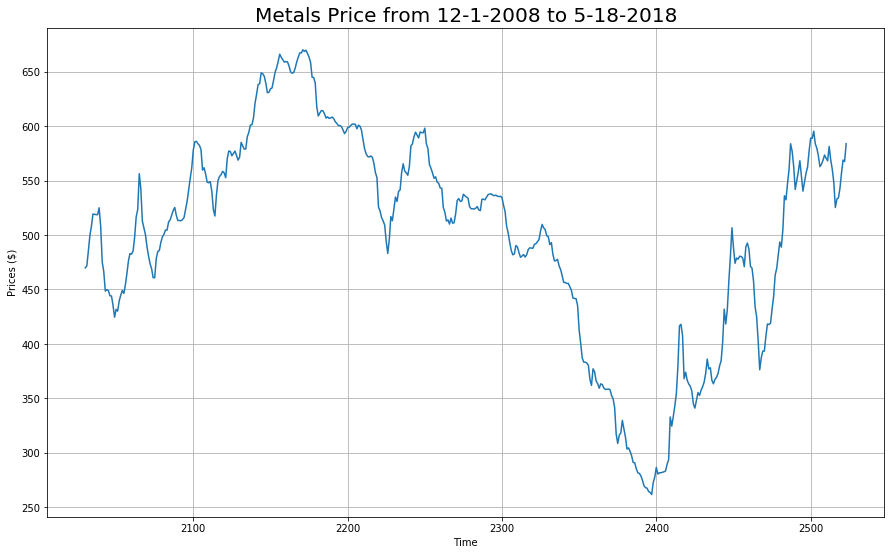

In [17]:
#line chart
x = df['week']
y = df['p1']
plot(x,y)
plt.grid()
plt.xlabel('Time')
plt.ylabel('Prices ($)')
plt.title('Metals Price from 12-1-2008 to 5-18-2018',fontsize=20)
plt.show

# II. Check for the Stationary of p1
### 1. Augmented Dickey-Fuller test

In [18]:
from pandas import Series
from statsmodels.tsa.stattools import adfuller

In [19]:
def adf_test(y):
    # perform Augmented Dickey Fuller test
    print('Results of Augmented Dickey-Fuller test:')
    dftest = adfuller(y, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['test statistic', 'p-value', '# of lags', '# of observations'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value ({})'.format(key)] = value
    print(dfoutput)

In [20]:
#check the stationary of p1
adf_test(df['p1'])

Results of Augmented Dickey-Fuller test:
test statistic           -1.373259
p-value                   0.595027
# of lags                 1.000000
# of observations       490.000000
Critical Value (1%)      -3.443766
Critical Value (5%)      -2.867457
Critical Value (10%)     -2.569921
dtype: float64


###  => p-value = 0.595 > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary (with 95% confidence)

### =>The time series of p1 is not stationary and will require differencing to make it stationary, at least a difference order of 1

In [21]:
#filter dataset, only keep 'date' and 'p1' values
p1data = df.iloc[:,0:2]

In [22]:
p1data.head()

,week,p1
0,2030,469.788255
1,2031,471.534605
2,2032,484.941516
3,2033,499.467805
4,2034,508.004203


### 2. Check the stationary of difference order of 1 of p1

In [23]:
p1diff = np.diff(df['p1'])

<function matplotlib.pyplot.show(*args, **kw)>

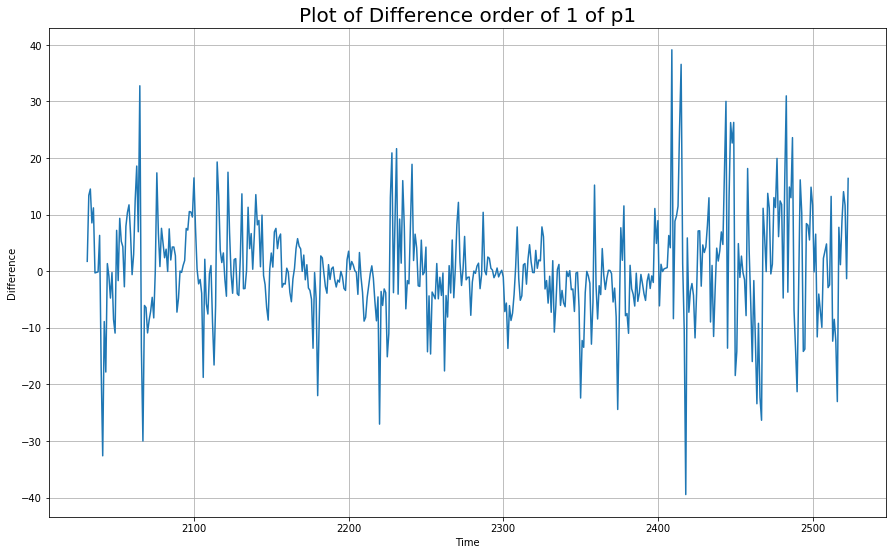

In [24]:
x = df['week'][1:,]
y = p1diff
plot(x,y)
plt.grid()
plt.xlabel('Time')
plt.ylabel('Difference')
plt.title('Plot of Difference order of 1 of p1',fontsize=20)
plt.show

In [25]:
adf_test(p1diff)

Results of Augmented Dickey-Fuller test:
test statistic         -1.531043e+01
p-value                 4.193654e-28
# of lags               0.000000e+00
# of observations       4.900000e+02
Critical Value (1%)    -3.443766e+00
Critical Value (5%)    -2.867457e+00
Critical Value (10%)   -2.569921e+00
dtype: float64


### => p-value <0.05 => the difference order of 1 of p1 is stationary (with confidence level of 95%)

# III. Autocorrelation and Partial Autocorrelation plot of the time series of p1
#### (To quantify the strength and type of relationship between observations of p1 and their lags.)

In [26]:
from pandas import datetime
from pandas.plotting import autocorrelation_plot

In [53]:
p1series = pd.Series(p1data['p1'].values, index=p1data['week'])

In [54]:
p1series.head()

week
2030    469.788255
2031    471.534605
2032    484.941516
2033    499.467805
2034    508.004203
dtype: float64

In [30]:
from pandas import Series
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot

In [31]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

In [32]:
lag_acf = acf(p1diff, nlags=50)
lag_pacf = pacf(p1diff, nlags=50, method='ols')

In [33]:
lag_acf

array([ 1.        ,  0.34581162,  0.16715727,  0.11109665,  0.09221409,
        0.08910448,  0.08360038, -0.0326746 , -0.0700521 , -0.11465114,
       -0.07753805,  0.01116952,  0.00141433, -0.04604065, -0.0284431 ,
       -0.02610424, -0.01673983, -0.05867036, -0.06954761, -0.04721949,
       -0.07922956, -0.02522119, -0.0613777 , -0.01077084,  0.0150939 ,
       -0.01540885, -0.01260213,  0.03812199,  0.0287986 ,  0.04266986,
        0.02700899,  0.02550449,  0.02321886,  0.0911884 ,  0.05340021,
        0.04040315,  0.02567921,  0.06929677,  0.08131174,  0.19399169,
        0.08945935, -0.00419606,  0.04794279,  0.14910315,  0.08658373,
        0.06866643,  0.02483133,  0.01350685, -0.00406544,  0.02907384,
        0.00336709])

In [36]:
lag_pacf

array([ 1.        ,  0.34796341,  0.0535804 ,  0.04522011,  0.04185032,
        0.0435495 ,  0.03445006, -0.09747077, -0.06255008, -0.09203501,
       -0.0127955 ,  0.06796438,  0.00736081, -0.03274528,  0.01238189,
       -0.00714477, -0.01555498, -0.07794242, -0.04717904, -0.00189616,
       -0.05495354,  0.04073501, -0.05518526,  0.05095565,  0.04121378,
       -0.03456427, -0.00882457,  0.02799661,  0.00521139,  0.01731704,
       -0.01682714,  0.01844145,  0.01126934,  0.10315024, -0.00567249,
       -0.01127547,  0.02414576,  0.06350439,  0.03489176,  0.17538251,
       -0.04687185, -0.06721132,  0.07595868,  0.15789279, -0.0388035 ,
       -0.00153271,  0.03051916,  0.04444948, -0.01359493,  0.03702391,
       -0.04393823])

Text(0.5,1,'Autocorrelation Function')

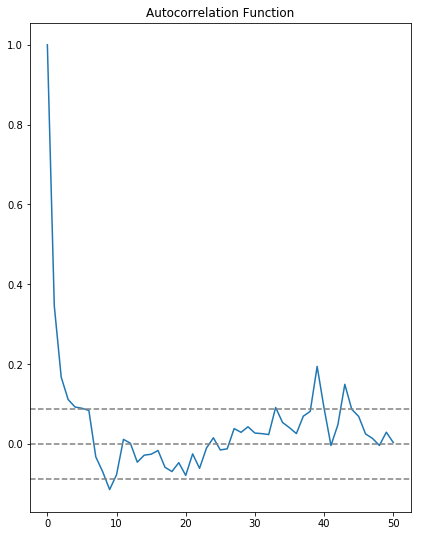

In [37]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(p1diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(p1diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

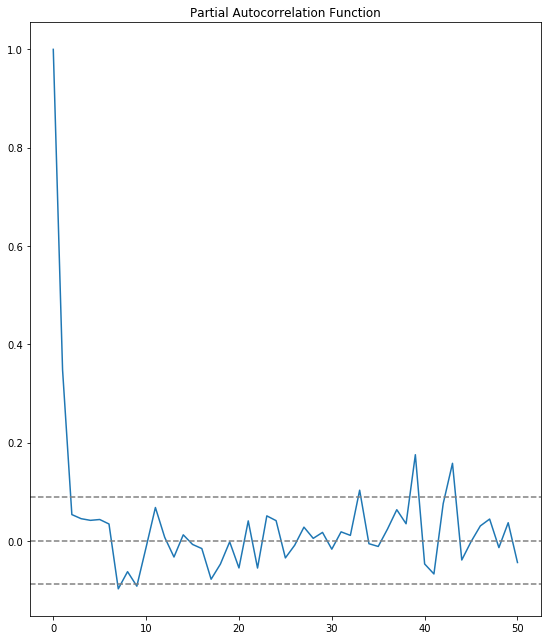

In [38]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(p1diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(p1diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

### We can see that there is a positive correlation with the first 50 lags that is perhaps significant for the first 10 lags.

#### => A good starting point for the AR parameter of the model may be 10.

# IV. ARIMA model

In [39]:
from statsmodels.tsa.arima_model import ARIMA
from pandas import DataFrame
from matplotlib import pyplot

### 1. Fit Model:
We will fit an ARIMA(10,1,0) model, which sets:
- The lag value to 10 for autoregression
- Uses a difference order of 1 to make the time series of p1 stationary
- Uses a moving average model of 0.

In [40]:
model = ARIMA(p1series, order=(10,1,0))

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [41]:
model_fit = model.fit(disp=0)

### 2. Print a summary of the fit model

In [42]:
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  491
Model:                ARIMA(10, 1, 0)   Log Likelihood               -1751.790
Method:                       css-mle   S.D. of innovations              8.572
Date:                Thu, 08 Nov 2018   AIC                           3527.581
Time:                        15:24:39   BIC                           3577.938
Sample:                             1   HQIC                          3547.356
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2476      0.578      0.428      0.669      -0.885       1.380
ar.L1.D.y      0.3124      0.045      6.915      0.000       0.224       0.401
ar.L2.D.y      0.0352      0.047      0.746      0.4

### 3. Plot residual errors

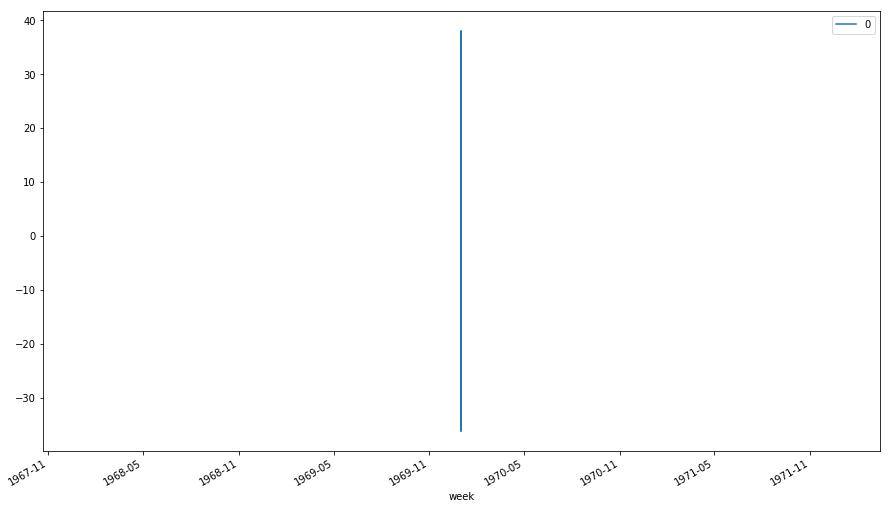

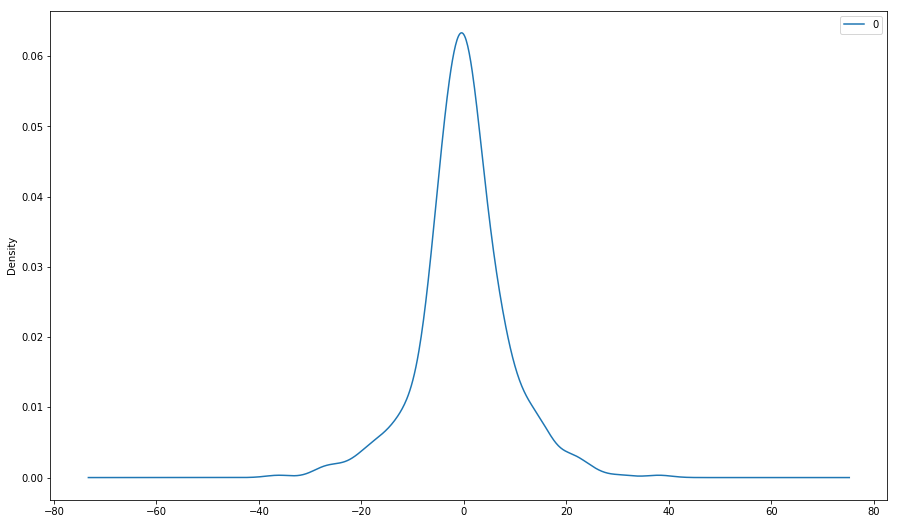

                0
count  491.000000
mean     0.003370
std      8.582145
min    -36.153620
25%     -3.901403
50%     -0.074011
75%      4.045298
max     38.122250


In [43]:
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

### => The distribution of the residual errors is displayed. The results show that indeed there is not bias in the prediction (a zero mean in the residuals).

# V. Forecast p1 with ARIMA Model

- We will split the training dataset into train and test sets (95%)
- Then use the train set to fit the model and generate a prediction for each element on the test set.

In [44]:
from sklearn.metrics import mean_squared_error

In [45]:
X = p1series.values
size = int(len(X) * 0.95)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(10,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

predicted=564.868643, expected=577.170184
predicted=582.112510, expected=588.848000
predicted=592.502085, expected=588.733494
predicted=591.059817, expected=595.290838
predicted=601.149589, expected=583.679659
predicted=583.029709, expected=579.646656
predicted=579.154945, expected=572.629755
predicted=569.223796, expected=562.712930
predicted=556.802168, expected=564.994435
predicted=563.165318, expected=568.546164
predicted=566.131333, expected=573.370101
predicted=574.318023, expected=570.477855
predicted=569.276176, expected=568.051989
predicted=568.515707, expected=581.279114
predicted=587.562099, expected=568.913798
predicted=566.754070, expected=560.416085
predicted=558.946257, expected=548.234367
predicted=543.836363, expected=525.196423
predicted=516.719407, expected=532.959842
predicted=533.972304, expected=534.112031
predicted=531.513203, expected=543.030242
predicted=544.666021, expected=557.096804
predicted=559.952042, expected=568.763557
predicted=574.522809, expected=567

### => Mean Squared Error score (MSE) of the predictions: 105.418
### => This is a great start, but we may be able to get improved results with a better configured ARIMA model.

(MSE will be a reference point of comparison for other ARIMA configurations as well as other models' performance)

## Calculate MAPE (mean absolute percentage error) ----- required by DeepVu

In [49]:
def mean_absolute_percentage_error(test,predictions): 
    test = np.array(test)
    predictions = np.array(predictions)
    return np.mean(np.abs((test - predictions) / test)) * 100

In [50]:
mean_absolute_percentage_error(test,predictions)

3.695157847809074

### => Our MAPE is: 3.69515

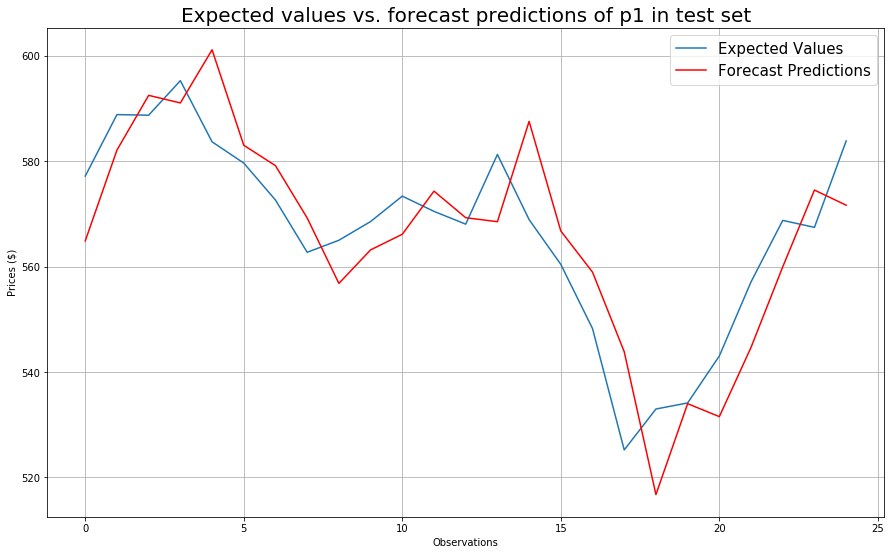

In [46]:
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.grid()
pyplot.xlabel('Observations')
pyplot.ylabel('Prices ($)')
pyplot.title('Expected values vs. forecast predictions of p1 in test set',fontsize=20)
pyplot.legend(['Expected Values','Forecast Predictions'],fontsize=15)
pyplot.show()

### A line plot is created showing the expected values (blue) compared to the rolling forecast predictions (red).
### We can see that our predictions of p1 are quite close to the expected values of p1 

# VI. Out-of-sample forecasts of p1

Forecast p1 for the next 10 weeks

In [51]:
forecast = model_fit.forecast(steps=10)[0]

In [52]:
forecast

array([571.65225702, 575.78894024, 580.69812147, 582.97523546,
       583.62242005, 582.46933811, 581.38358571, 580.34430788,
       580.1201207 , 579.45437622])